# Task 7: Basic Sales Summary Using SQLite in Python
This notebook demonstrates how to connect to a SQLite database, run SQL queries, and visualize results using pandas and matplotlib.

In [1]:
# Step 1: Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 2: Create and connect to SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 3: Create table and insert sample data
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

sample_data = [
    ('Apples', 10, 2.5),
    ('Oranges', 5, 3.0),
    ('Bananas', 8, 1.5),
    ('Apples', 3, 2.5),
    ('Oranges', 7, 3.0)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

In [3]:
# Step 4: Query total quantity and revenue by product
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print("Sales Summary:")
print(df)

Sales Summary:
   product  total_qty  revenue
0   Apples         13     32.5
1  Bananas          8     12.0
2  Oranges         12     36.0


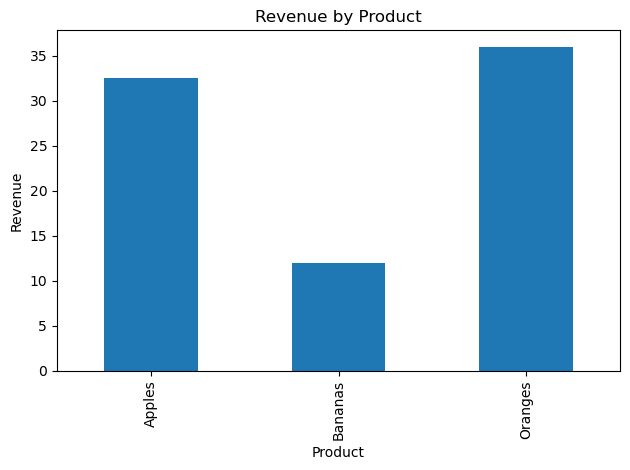

In [4]:
# Step 5: Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()

In [5]:
# Close the connection
conn.close()